In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cancer_data_denmark.csv")

df.info()
df.describe()
df.head()


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
pip install matplotlib seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 10.0 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 5.6 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 4.6 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 4.0 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 4.0 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 3.3 MB/s eta 0:00:02
   ------------------------- -------------- 5.2/8.1 MB 3.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 3.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 2.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 2.7 MB/s eta 0:00:01
   ---------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("cancer_data_denmark.csv")


In [5]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_ID            3000 non-null   int64  
 1   Age                   3000 non-null   int64  
 2   Gender                3000 non-null   object 
 3   Region                3000 non-null   object 
 4   Cancer_Type           3000 non-null   object 
 5   Stage                 3000 non-null   object 
 6   Diagnosis_Date        3000 non-null   object 
 7   Treatment_Type        3000 non-null   object 
 8   Treatment_Start_Date  3000 non-null   object 
 9   Treatment_End_Date    3000 non-null   object 
 10  Tumor_Size_cm         3000 non-null   float64
 11  Lymph_Nodes_Examined  3000 non-null   int64  
 12  Lymph_Nodes_Positive  3000 non-null   int64  
 13  Metastasis            3000 non-null   object 
 14  Genetic_Mutation      2211 non-null   object 
 15  Smoking_Status       

,Patient_ID,Age,Gender,Region,Cancer_Type,Stage,Diagnosis_Date,Treatment_Type,Treatment_Start_Date,Treatment_End_Date,...,Smoking_Status,Alcohol_Consumption,BMI,Comorbidities,Family_History,Survival_Months,Relapse,Occupation,Income_Level,Followup_Date
0,1,69,Male,Hovedstaden,Leukemia,III,2015-06-26,Radiation,2015-11-19,2020-04-24,...,Current,NaN,19.4,Multiple,Yes,83,No,Office Worker,Low,2022-12-13
1,2,41,Male,Sjælland,Lung,I,2016-03-05,Hormone Therapy,2022-07-01,2023-12-16,...,Never,Moderate,26.6,Multiple,No,108,Yes,Healthcare,High,2024-08-15
2,3,47,Female,Syddanmark,Prostate,II,2017-09-17,Radiation,2022-05-09,2023-06-10,...,Never,Moderate,26.2,NaN,No,108,No,Retired,Medium,2024-06-16
3,4,66,Male,Midtjylland,Skin,I,2018-03-07,Immunotherapy,2019-02-19,2020-06-03,...,Current,Heavy,15.4,Hypertension,Yes,108,Yes,Office Worker,High,2024-04-27
4,5,72,Male,Syddanmark,Breast,II,2019-11-09,Chemotherapy,2019-11-17,2023-03-16,...,Former,Heavy,19.2,Hypertension,Yes,39,No,Manual Labor,Low,2023-05-22


In [9]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
date_cols = ['Diagnosis_Date', 'Treatment_Start_Date', 'Treatment_End_Date', 'Followup_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

df.isnull().sum()

df.drop_duplicates(inplace=True)


<Axes: title={'center': 'Cancer Type Count'}, ylabel='Cancer_Type'>

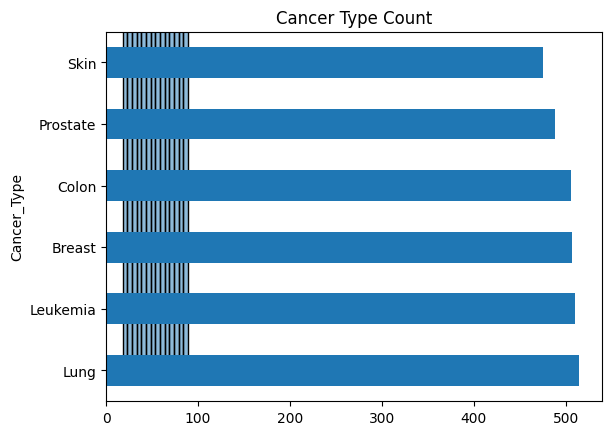

In [12]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")

df['Cancer_Type'].value_counts().plot(kind='barh', title='Cancer Type Count')


Text(0.5, 1.0, 'Survival by Stage')

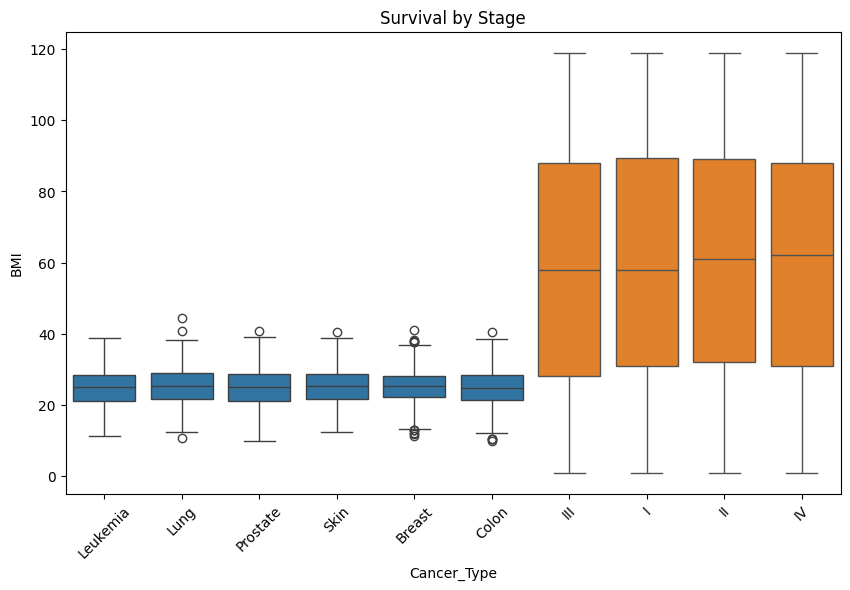

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cancer_Type', y='BMI', data=df)
plt.xticks(rotation=45)
plt.title("BMI by Cancer Type")

sns.boxplot(x='Stage', y='Survival_Months', data=df)
plt.title("Survival by Stage")


Text(0.5, 1.0, 'Correlation Matrix')

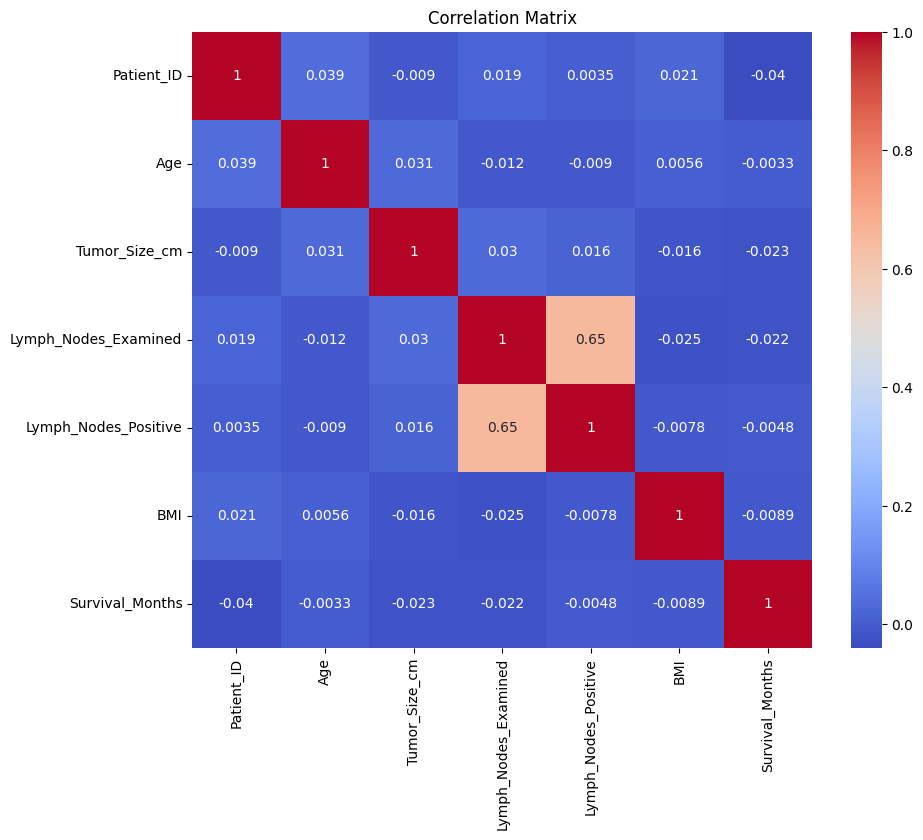

In [14]:
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")


Text(0.5, 1.0, 'Survival by Smoking Status')

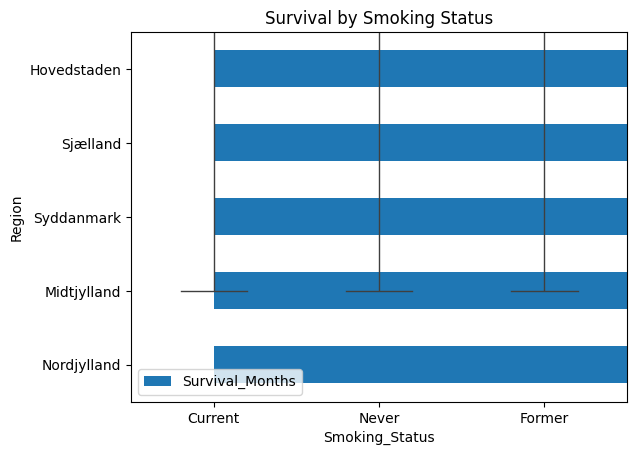

In [15]:
df.groupby('Region')['Survival_Months'].mean().sort_values().plot(kind='barh')
plt.title("Average Survival by Region")

sns.boxplot(x='Smoking_Status', y='Survival_Months', data=df)
plt.title("Survival by Smoking Status")
